In [1]:
import numpy as np

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox.random import Distribution

from sklearn.datasets import load_iris

from sklearn.cluster import DBSCAN as skl_DBSCAN
from fromscratchtoml.cluster import DBSCAN as fs2ml_DBSCAN

%matplotlib inline

## DBSCAN - Density-based spatial clustering of applications with noise

In [2]:
eps = 0.5
min_points = 5

X = load_iris().data

In [3]:
skl_db = skl_DBSCAN(eps, min_points)

In [4]:
skl_db.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [5]:
fs2ml_db = fs2ml_DBSCAN(eps, min_points)

In [6]:
fs2ml_db.fit(X)

DBSCAN({'eps': 0.5, 'min_neigh': 5})

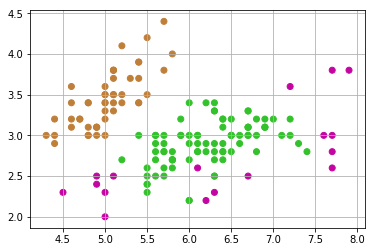

In [7]:
binary_visualize(X, skl_db.labels_)

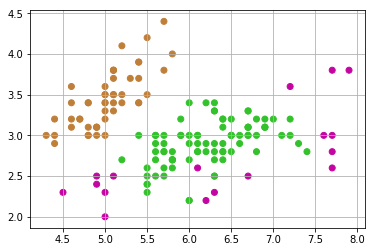

In [8]:
binary_visualize(X, fs2ml_db.clan)

## Classifying against custom data

In [9]:
x1 = Distribution.linear(pts=10, mean=[0, 20])
y1 = np.ones([len(x1), 1])

x2 = Distribution.linear(pts=10, mean=[0, 0])
y2 = -np.ones([len(x2), 1])

x3 = Distribution.linear(pts=10, mean=[2, 10])
y3 = 2*np.ones([len(x3), 1])

X = np.vstack([x1, x2, x3])
Y = np.vstack([y1, y2, y3])

In [10]:
eps = 2
min_points = 2

In [11]:
fs2ml_db = fs2ml_DBSCAN(eps, min_points)
fs2ml_db.fit(X)

DBSCAN({'eps': 2, 'min_neigh': 2})

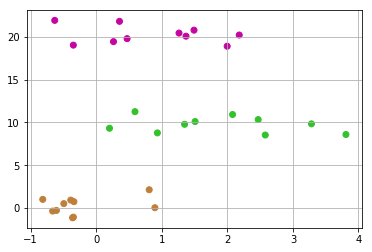

In [12]:
binary_visualize(X, fs2ml_db.clan)

In [13]:
skl_db = skl_DBSCAN(eps, min_points)
skl_db.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

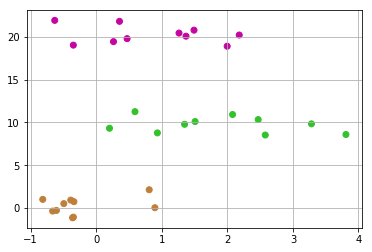

In [14]:
binary_visualize(X, skl_db.labels_)